In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

from helpers import loadData, loadDataFromPath

In [3]:
# Load data
X_tr, y_tr = loadData("train")
X_te, y_te = loadData("test")


In [10]:
# Build model
model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(10))

In [11]:
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu',input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(10,  activation='softmax'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)       

In [14]:
# Train model
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(X_tr, y_tr, epochs=10, 
                    validation_data=(X_te, y_te))

Epoch 1/10
2290/2290 [==============================] - 379s 164ms/step - loss: 1.6479 - accuracy: 0.4014 - val_loss: 0.6011 - val_accuracy: 0.8261
Epoch 2/10
2290/2290 [==============================] - 345s 151ms/step - loss: 0.5903 - accuracy: 0.8254 - val_loss: 0.3839 - val_accuracy: 0.8931
Epoch 3/10
2290/2290 [==============================] - 214s 94ms/step - loss: 0.4354 - accuracy: 0.8758 - val_loss: 0.4170 - val_accuracy: 0.8765
Epoch 4/10
2290/2290 [==============================] - 208s 91ms/step - loss: 0.3789 - accuracy: 0.8937 - val_loss: 0.2749 - val_accuracy: 0.9270
Epoch 5/10
2290/2290 [==============================] - 206s 90ms/step - loss: 0.3466 - accuracy: 0.9028 - val_loss: 0.2900 - val_accuracy: 0.9210
Epoch 6/10
2290/2290 [==============================] - 224s 98ms/step - loss: 0.3168 - accuracy: 0.9104 - val_loss: 0.2434 - val_accuracy: 0.9355
Epoch 7/10
2290/2290 [==============================] - 229s 100ms/step - loss: 0.3032 - accuracy: 0.9153 - val_loss

814/814 - 18s - loss: 0.2129 - accuracy: 0.9451 - 18s/epoch - 22ms/step
Test accuracy: 0.9451444149017334


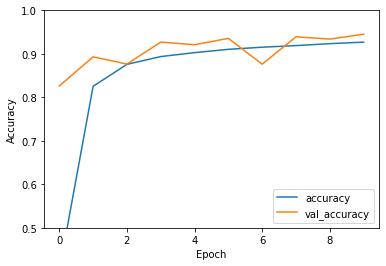

In [15]:
# Evaluate model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_te,  y_te, verbose=2)
print("Test accuracy: {}".format(test_acc))

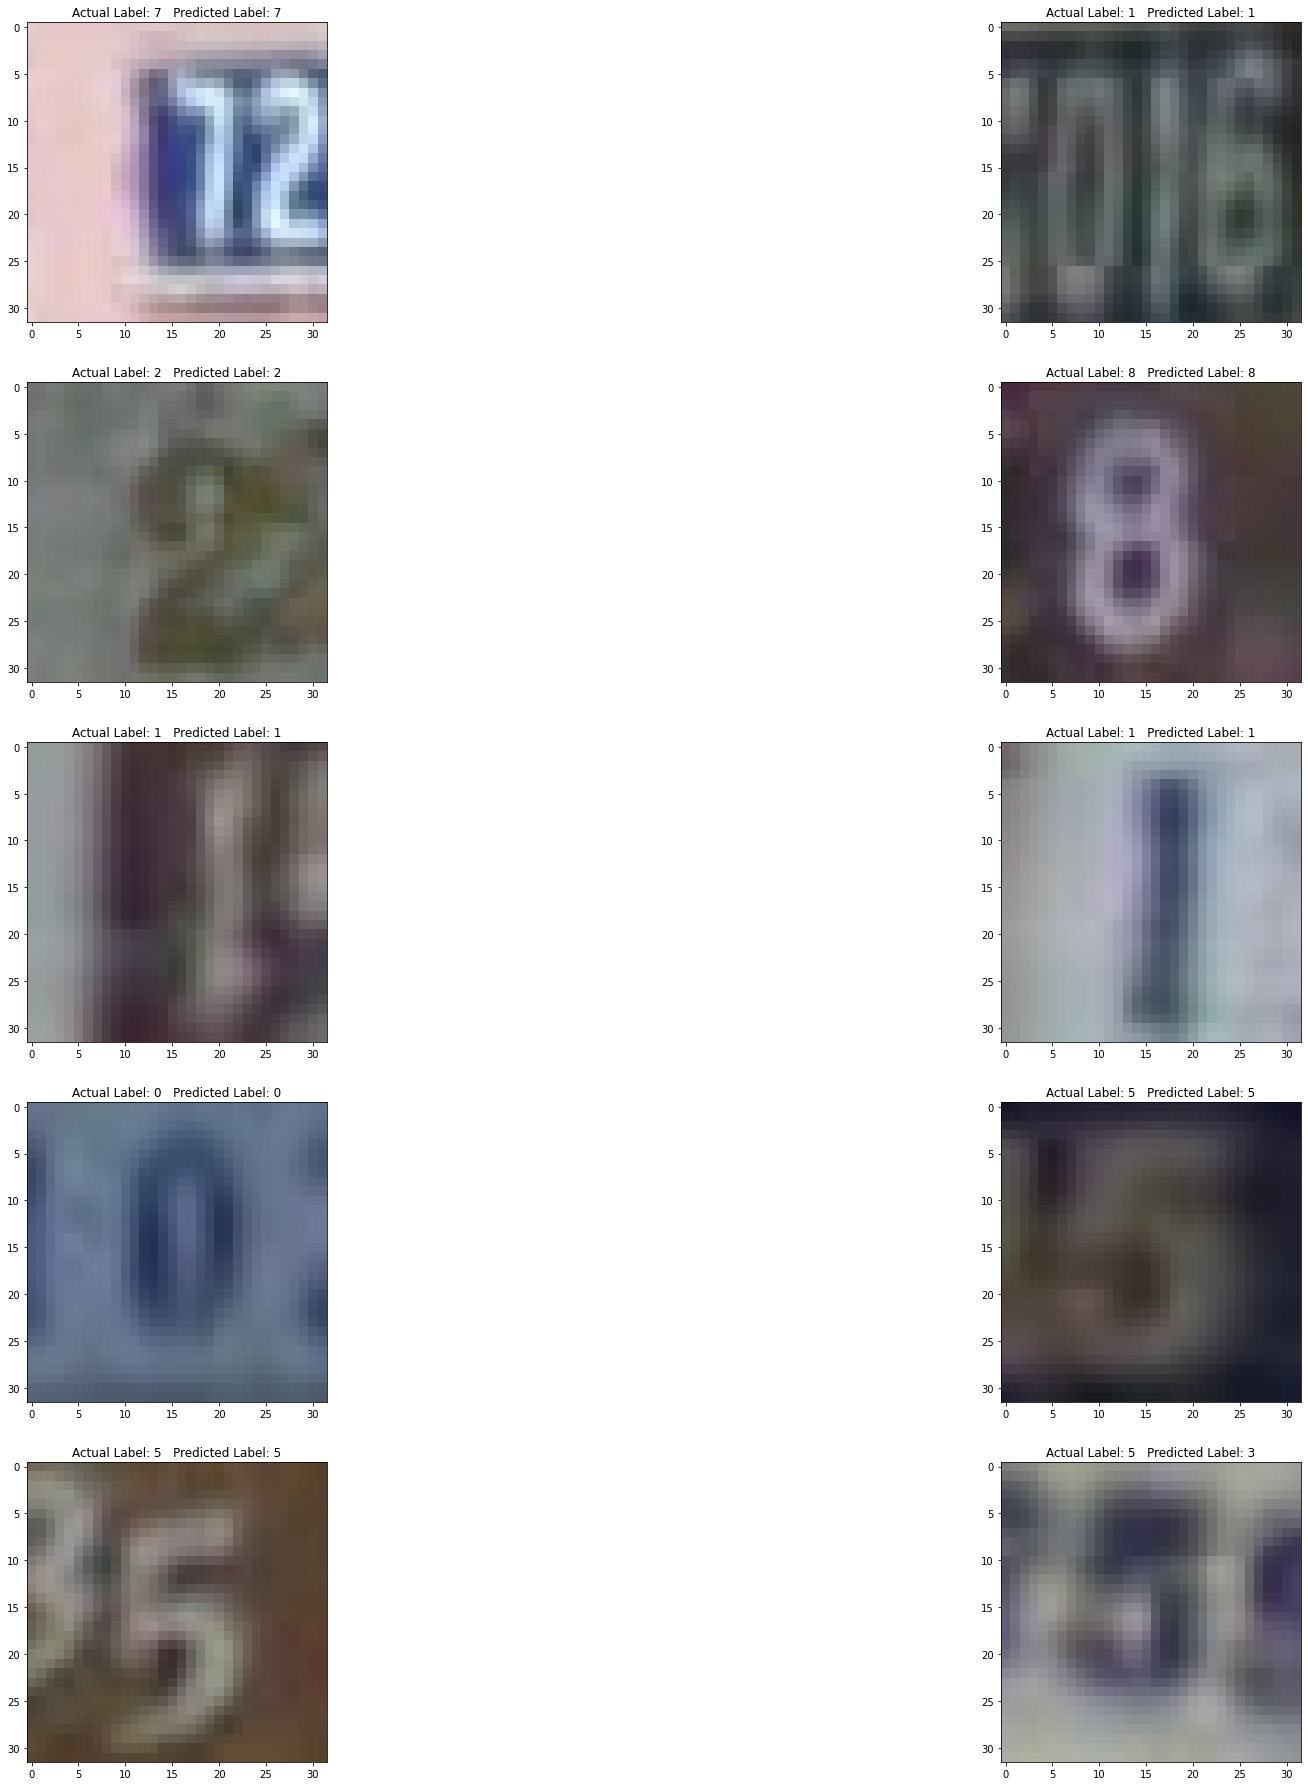

In [16]:
# Display 10 random testing images and their predicted and actual label
y_te_pred = model.predict(X_te)
n = X_te.shape[0]
s = 10
f, ax = plt.subplots(s//2, 2, figsize=(32, 32))
rand_ind = np.random.randint(0, high=n, size=s)
for i, ind in zip(range(s),rand_ind):
    ax[i//2][i%2].imshow(X_te[ind,:,:,:])
    ax[i//2][i%2].set_title("Actual Label: {}   Predicted Label: {}".format(y_te[ind][0], np.argmax(y_te_pred[ind])))